In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def encodage_X(X, type='standard'):
  X_num = X.select_dtypes('number')

  if type == 'standard':
    from sklearn.preprocessing import StandardScaler
    SN = StandardScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

  else:
    from sklearn.preprocessing import MinMaxScaler
    SN = MinMaxScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

  return X_num_SN, SN

def encodage_predict(df_a_predire):
  X_num = df_a_predire.select_dtypes('number')

  X_num_SN = pd.DataFrame(SN.transform(X_num), columns=X_num.columns)

  X_encoded_predire = X_num_SN

  df_predict = X_encoded_predire

  # DataFrame vide qui a les mêmes colonnes que X_encoded
  df_final = pd.DataFrame(columns=X_encoded.columns)

  # On veut que le DataFrame ait le même nombre de lignes que df_predict
  df_final = df_final.reindex(index=df_predict.index)
  # On met tous les NaN à False
  df_final = df_final.fillna(False)

  # On parcourt chaque colonne de df_predict
  # Si la colonne est présente dans X_encoded alors on la garde
  # Sinon, on la met à False
  for column in df_predict.columns:
    if column in X_encoded.columns:
      df_final[column] = df_predict[column]

  return df_final

#Jeu de données proposé (donnees_climat_new2.csv)

- date : la date de l'enregistrement des données.
- température : température moyenne journalière (en degrés Celsius).
- précipitations : quantité de précipitations en mm.
- qualité_air : indice de qualité de l'air (valeurs de 0 à 500, où 0-50 est bon, 51-100 modéré, etc.).
- vent_vitesse : vitesse moyenne du vent en km/h.
- ensoleillement : durée d'ensoleillement en heures.



In [ ]:
link = '/content/donnees_climat_new2.csv'
df = pd.read_csv(link)

# Analyse exploratoire des données

## 1. Analyse exploratoire initiale :
- Affichez les 10 premières lignes du jeu de données
- Décrivez la structure générale du dataset (nombre de lignes, colonnes, types de données)
- Analysez les statistiques descriptives de chaque variable numérique
- Quelles sont les variables qui nécessitent un traitement particulier ?

In [ ]:
# Affichez les 10 premières lignes du jeu de données

df.head(10)

,Unnamed: 0,date,température,précipitations,qualité_air,vent_vitesse,ensoleillement
0,0,2022-01-01,13.715194,1.346329,72.251908,78.088518,6.585762
1,1,2022-01-02,3.390604,0.675563,37.634978,16.632461,8.582272
2,2,2022-01-03,9.147855,0.284980,99.298053,55.268647,7.233161
3,3,2022-01-04,3.963410,0.497824,118.985175,41.376821,6.538598
4,4,2022-01-05,10.589993,0.440925,44.180741,15.148601,5.083858
5,5,2022-01-06,10.321248,0.612137,114.199877,16.207299,7.750729
6,6,2022-01-07,10.756649,0.810775,48.648904,96.346999,5.251047
7,7,2022-01-08,1.137711,0.030395,64.833760,30.496418,10.701276
8,8,2022-01-09,-1.468171,0.120027,110.331559,94.143929,11.563953
9,9,2022-01-10,8.385134,0.688241,119.502725,7.561067,4.601298


In [ ]:
# Décrivez la structure générale du dataset (nombre de lignes, colonnes, types de données)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      365 non-null    int64  
 1   date            365 non-null    object 
 2   température     365 non-null    float64
 3   précipitations  365 non-null    float64
 4   qualité_air     365 non-null    float64
 5   vent_vitesse    365 non-null    float64
 6   ensoleillement  365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
# Analysez les statistiques descriptives de chaque variable numérique

df.describe()

,Unnamed: 0,température,précipitations,qualité_air,vent_vitesse,ensoleillement
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,182.000000,14.534996,1.426190,84.169447,51.071126,5.899738
std,105.510663,8.512072,1.382394,32.937707,28.316298,3.470380
min,0.000000,-5.504124,0.008102,0.000000,0.007370,0.056346
25%,91.000000,7.898994,0.440925,58.129949,28.351378,2.889945
50%,182.000000,14.478607,1.086633,81.935148,52.808193,6.015893
75%,273.000000,20.341298,1.933896,112.486658,72.894770,8.703051
max,364.000000,34.876959,10.312157,148.880265,99.490191,11.986164


In [ ]:
# Quelles sont les variables qui nécessitent un traitement particulier ?

'''
Il faut changer le format de la colonne DATE en datetime.
On peut supprimer la colonne unamed pour garder uniquement l'index.
'''

"\nIl faut changer le format de la colonne DATE en datetime.\nOn peut supprimer la colonne unamed pour garder uniquement l'index.\n"

## 2. Analyse temporelle :
- Créez une colonne de date à partir de la colonne existante
- Quel est le jour le plus chaud de l'année ?
- Quel est le jour le plus pluvieux ?
- Quelle est la moyenne des températures par mois ?
- Créer des colonnes pour le mois et la saison

In [ ]:
# Créez une colonne de date à partir de la colonne existante

df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Quel est le jour le plus chaud de l'année ?

df[df['température'] == df['température'].max()]

,Unnamed: 0,date,température,précipitations,qualité_air,vent_vitesse,ensoleillement
228,228,2022-08-17,34.876959,0.140698,115.469983,95.591231,11.368447


In [ ]:
# Quel est le jour le plus pluvieux ?

df[df['précipitations'] == df['précipitations'].max()]

,Unnamed: 0,date,température,précipitations,qualité_air,vent_vitesse,ensoleillement
16,16,2022-01-17,8.096509,10.312157,0.0,69.811638,0.242621


In [ ]:
# Quelle est la moyenne des températures par mois ?

df['mois'] = df['date'].dt.month

round(df[['température', 'mois']].groupby('mois').mean(), 2)

,température
mois,
1,5.17
2,3.78
3,13.90
4,14.02
5,15.83
6,24.23
7,24.51
8,24.89
9,14.30


In [ ]:
# Créer des colonnes pour le mois et la saison

df['saison'] = ''
df['saison'][(df['mois'] == 12) | (df['mois'] == 1) | (df['mois'] == 2)] = 'Hiver'
df['saison'][(df['mois'] == 3) | (df['mois'] == 4) | (df['mois'] == 5)] = 'Printemps'
df['saison'][(df['mois'] == 6) | (df['mois'] == 7) | (df['mois'] == 8)] = 'Eté'
df['saison'][(df['mois'] == 9) | (df['mois'] == 10) | (df['mois'] == 11)] = 'Automne'

<ipython-input-697-f9f01602b0c2>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['saison'][(df['mois'] == 12) | (df['mois'] == 1) | (df['mois'] == 2)] = 'Hiver'
<ipython-input-697-f9f01602b0c2>:4: SettingWithCopyWarning: 
A value is tryi


## 3. Création d'indicateurs :
- Créer un indicateur de "jour de pluie" (précipitations > 1mm)
- Créer un indicateur de "jour de forte chaleur" (température > 25°C)
- Créer un indicateur de "mauvaise qualité d'air" (qualité_air > 100)



In [ ]:
# Créer un indicateur de "jour de pluie" (précipitations > 1mm)
df['indic_pluie'] = ''
df['indic_pluie'][df['précipitations'] > 1.0] = "Jour de pluie"

<ipython-input-698-1f81cfa1d83c>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['indic_pluie'][df['précipitations'] > 1.0] = "Jour de pluie"
<ipython-input-698-1f81cfa1d83c>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
# Créer un indicateur de "jour de forte chaleur" (température > 25°C)

df['indic_chaleur'] = ''
df['indic_chaleur'][df['température'] > 25.0] = 'Jour de forte chaleur'

<ipython-input-699-cf3b6cf748cf>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['indic_chaleur'][df['température'] > 25.0] = 'Jour de forte chaleur'
<ipython-input-699-cf3b6cf748cf>:4: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
# Créer un indicateur de "mauvaise qualité d'air" (qualité_air > 100)

df['indic_air'] = ''
df['indic_air'][df['qualité_air'] > 100.0] = "Mauvaise qualité d'air"

<ipython-input-700-55056feec559>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['indic_air'][df['qualité_air'] > 100.0] = "Mauvaise qualité d'air"
<ipython-input-700-55056feec559>:4: SettingWithCopyWarning: 
A value is trying to be set 

# Visualisations

## 1. Histogramme de la température :
- Visualiser la distribution des températures.
- Interpréter les tendances (par exemple, les températures sont-elles généralement élevées, basses, variées ?).



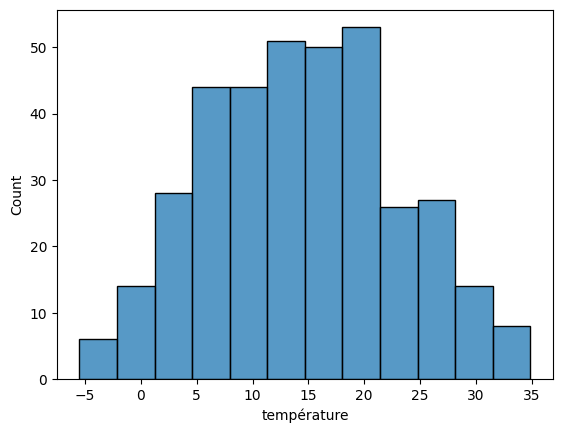

In [ ]:
sns.histplot(data = df,
             x = 'température');

## 2.Diagramme en boîte de la qualité de l'air :
- Examiner la distribution de l'indice de qualité de l'air.
- Identifier les éventuelles valeurs aberrantes.



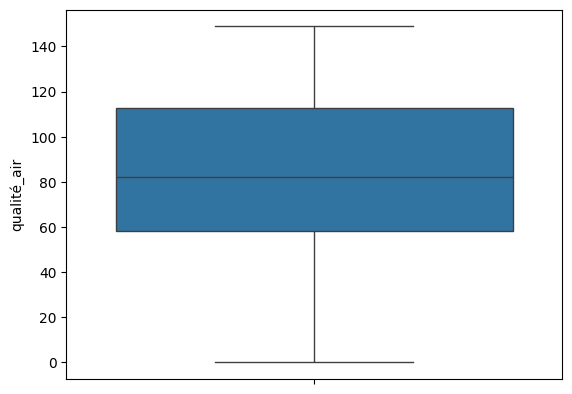

In [ ]:
sns.boxplot(df['qualité_air']);

## 3.Nuage de points entre précipitations et ensoleillement :
- Analyser la relation entre les précipitations et l'ensoleillement.
- Évaluer s'il y a une corrélation négative, comme on pourrait s'y attendre.



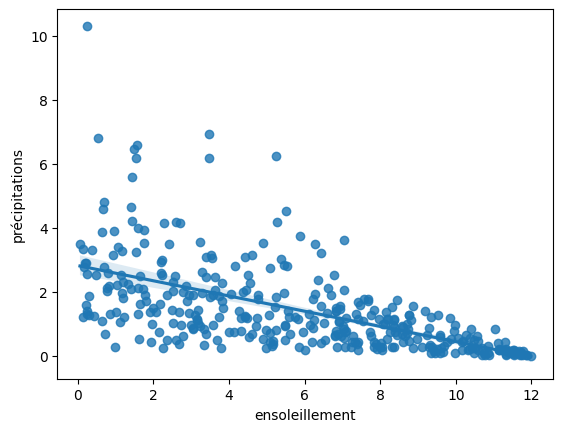

In [ ]:
sns.regplot(data = df,
                y = 'précipitations',
                x = 'ensoleillement');

## 4.Graphique en barres de la vitesse du vent :
- Représenter la fréquence des différentes vitesses de vent.
- Découvrir les vitesses de vent les plus communes.



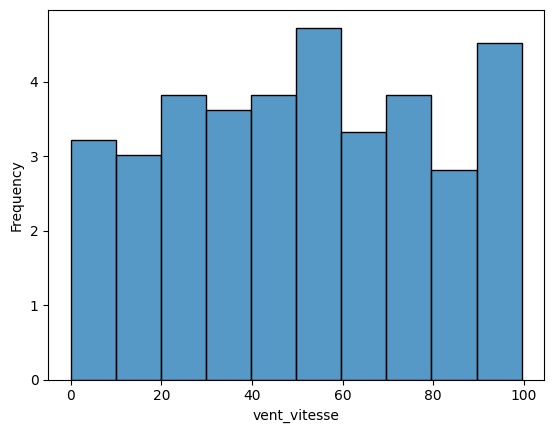

In [ ]:
sns.histplot(data = df,
             x = 'vent_vitesse',
             stat = 'frequency');

## 5.Ligne du temps de la température :
- Tracer l'évolution de la température au fil du temps.
- Vérifier s'il y a des tendances saisonnières ou des anomalies.



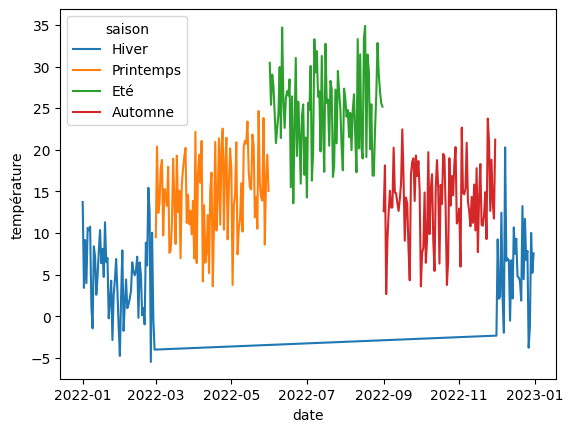

In [ ]:
sns.lineplot(data = df,
                x = 'date',
                y = 'température',
                hue = 'saison');

## 6.Graphique circulaire de la distribution de la qualité de l'air :
- Répartir la qualité de l'air en catégories (bon, modéré, etc.) et visualiser leur proportion.
- Interpréter la qualité de l'air générale.



In [ ]:
# valeurs de 0 à 500, où 0-50 est bon, 51-100 modéré, etc.

df['categorie_air'] = pd.cut(df['qualité_air'],
                             bins = ([0, 50, 100, 150]),
                             labels = ['Bon', 'Modéré', 'Mauvais'])

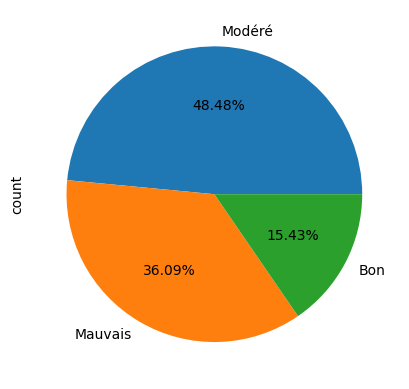

In [ ]:
df['categorie_air'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%');

## 7.Heatmap de corrélation :
- Examiner les corrélations entre toutes les variables.
- Identifier les paires de variables qui sont fortement liées.

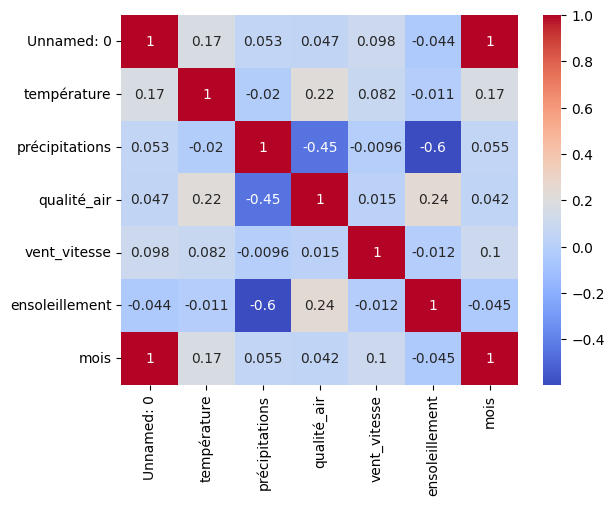

In [ ]:
corr = df.select_dtypes(include = 'number').corr()

sns.heatmap(data = corr,
            cmap = 'coolwarm',
            annot = True);

# Regression

Créer un modèle de ML de regression linéaire, avec un random state de train_test_split à 13, afin de prédire la température en fonction des autres données, et fais ensuite quelques prédictions de test.

Tu n'oublieras pas de faire une normalisation ou standardisation, en fonction de la situation.

Que penser du modèle ?

Version 1

In [ ]:
link = '/content/donnees_climat_new2.csv'
df = pd.read_csv(link)

df['date'] = df['date'].astype(str)
df['date_float'] = ''
for n in range(len(df)):
  df.loc[n, 'date_float'] = datetime.strptime(df.loc[n, 'date'],'%Y-%m-%d')
  df.loc[n, 'date_float'] = df.loc[n, 'date_float'].timestamp()
df['date_float'] = df['date_float'].astype(float)
y = df['température']
df = df.drop(['température', 'date', 'Unnamed: 0'], axis = 1)

In [ ]:
df_num = df

SN = StandardScaler()
df_num_SN = pd.DataFrame(SN.fit_transform(df_num), columns=df_num.columns)

X_train, X_test, y_train, y_test = train_test_split(df_num_SN, y, train_size=0.8, random_state=13)

modele = LinearRegression()

modele.fit(X_train, y_train)

print(f"Score d'entrainement {modele.score(X_train, y_train)}")
print(f"Score de test {modele.score(X_test, y_test)}")

Score d'entrainement 0.06844116323648619
Score de test 0.104448525574516


In [ ]:
pd.DataFrame({'Colonnes' : df.columns,
              'Coeff' : modele.coef_})

,Colonnes,Coeff
0,précipitations,0.376260
1,qualité_air,1.746231
2,vent_vitesse,0.821641
3,ensoleillement,-0.336373
4,date_float,1.068329


Version 2

In [ ]:
df_num = df

X_train, X_test, y_train, y_test = train_test_split(df_num, y, train_size=0.8, random_state=13)

SN = StandardScaler()
df_num_SN = pd.DataFrame(SN.fit_transform(df_num), columns=df_num.columns)

X_train_scaled = SN.fit_transform(X_train)
X_test_scaled = SN.transform(X_test)

modele = LinearRegression()

modele.fit(X_train_scaled, y_train)

print(f"Score d'entrainement {modele.score(X_train_scaled, y_train)}")
print(f"Score de test {modele.score(X_test_scaled, y_test)}")

Score d'entrainement 0.06844116323648619
Score de test 0.104448525574516


In [ ]:
pd.DataFrame({'Colonnes' : df.columns,
              'Coeff' : modele.coef_})

,Colonnes,Coeff
0,précipitations,0.392238
1,qualité_air,1.737972
2,vent_vitesse,0.816836
3,ensoleillement,-0.339248
4,date_float,1.071273


Solution JO

In [ ]:
link = '/content/donnees_climat_new2.csv'
df = pd.read_csv(link)

y = df['température']
df = df.drop(['température', 'date'], axis = 1)
X = df

X_encoded, SN = encodage_X(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.8, random_state=13)

modele = LinearRegression()

modele.fit(X_train, y_train)

print(f"Score d'entrainement {modele.score(X_train, y_train)}")
print(f"Score de test {modele.score(X_test, y_test)}")

Score d'entrainement 0.06844116323648597
Score de test 0.104448525574516


In [ ]:
pd.DataFrame({'Colonnes' : X.columns,
              'Coeff' : modele.coef_})

,Colonnes,Coeff
0,Unnamed: 0,1.068329
1,précipitations,0.376260
2,qualité_air,1.746231
3,vent_vitesse,0.821641
4,ensoleillement,-0.336373


In [ ]:
dico = {
    'Unnamed: 0' : [df['Unnamed: 0'][df['date'] == '2022-12-29'].iloc[0], df['Unnamed: 0'][df['date'] == '2022-08-28'].iloc[0], df['Unnamed: 0'][df['date'] == '2022-04-07'].iloc[0], df['Unnamed: 0'][df['date'] == '2022-10-10'].iloc[0]],
    'date' : ['2022-12-29', '2022-08-28', '2022-04-07', '2022-10-10'],
    'précipitations' : [df['précipitations'][df['date'] == '2022-12-29'].iloc[0], df['précipitations'][df['date'] == '2022-08-28'].iloc[0], df['précipitations'][df['date'] == '2022-04-07'].iloc[0], df['précipitations'][df['date'] == '2022-10-10'].iloc[0]],
    'qualité_air' : [df['qualité_air'][df['date'] == '2022-12-29'].iloc[0], df['qualité_air'][df['date'] == '2022-08-28'].iloc[0], df['qualité_air'][df['date'] == '2022-04-07'].iloc[0], df['qualité_air'][df['date'] == '2022-10-10'].iloc[0]],
    'vent_vitesse' : [df['vent_vitesse'][df['date'] == '2022-12-29'].iloc[0], df['vent_vitesse'][df['date'] == '2022-08-28'].iloc[0], df['vent_vitesse'][df['date'] == '2022-04-07'].iloc[0], df['vent_vitesse'][df['date'] == '2022-10-10'].iloc[0]],
    'ensoleillement' : [df['ensoleillement'][df['date'] == '2022-12-29'].iloc[0], df['ensoleillement'][df['date'] == '2022-08-28'].iloc[0], df['ensoleillement'][df['date'] == '2022-04-07'].iloc[0], df['ensoleillement'][df['date'] == '2022-10-10'].iloc[0]],
}
df_quelonveutpredire = pd.DataFrame(dico)

df_pour_prediction = encodage_predict(df_quelonveutpredire)

modele.predict(df_pour_prediction)

df_quelonveutpredire['prediction'] = modele.predict(df_pour_prediction)
df_quelonveutpredire

<ipython-input-687-ac4d0b0c1b60>:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.fillna(False)


,Unnamed: 0,date,précipitations,qualité_air,vent_vitesse,ensoleillement,prediction
0,362,2022-12-29,1.023047,71.766166,53.450894,6.525671,15.783142
1,239,2022-08-28,0.550341,70.588764,75.693533,7.041412,14.940906
2,96,2022-04-07,2.055318,87.503637,53.233607,7.038155,14.146890
3,282,2022-10-10,1.144025,71.612104,27.624767,7.414520,14.160113


In [ ]:
link = '/content/donnees_climat_new2.csv'
df = pd.read_csv(link)

resultat = pd.merge(df_quelonveutpredire,
                    df[['température', 'date']],
                    how = 'left',
                    on = 'date')
resultat

,Unnamed: 0,date,précipitations,qualité_air,vent_vitesse,ensoleillement,prediction,température
0,362,2022-12-29,1.023047,71.766166,53.450894,6.525671,15.783142,9.996640
1,239,2022-08-28,0.550341,70.588764,75.693533,7.041412,14.940906,29.092178
2,96,2022-04-07,2.055318,87.503637,53.233607,7.038155,14.146890,21.056818
3,282,2022-10-10,1.144025,71.612104,27.624767,7.414520,14.160113,17.052351
